## Analysis of Wearable Device Exercises

The following analysis represents the final assessment in the Course of __Practical Machine Learning from Coursera__ that studies 6 individuals and the data produced in wearable devices to understand 5 classes of exercises performed using such devices.

In [44]:
%matplotlib inline

# Processing and plotting libraries
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
import math
import matplotlib.pylab as plt

This are the group of libraries required for the scientific operations

In [45]:
# Scientific Libraries
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Dataset

The following data set is facilitated in the following address http://groupware.les.inf.puc-rio.br/har
__Human Activity Recognition__ is the main field of application for this study.

Classes:
1. sitting-down
2. standing-up
3. standing
4. walking
5. sitting

Loading data sets from origin

In [46]:
empty_values = ["NA", "", "#DIV/0!"]
training = pd.read_csv("https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv", na_values=empty_values)
testing = pd.read_csv("https://d396qusza40orc.cloudfront.net/predmachlearn/pml-testing.csv", na_values=empty_values)

### EDA

The following plot, identifies the columns with empty or null values, target of elimination, as they do not contribute to the analysis of the data

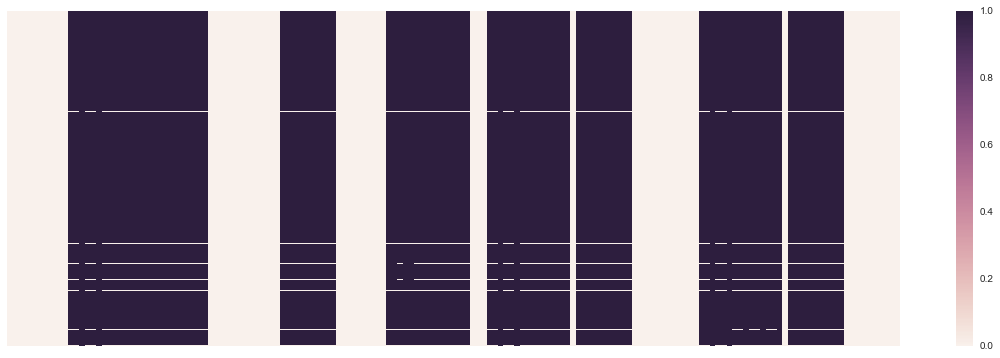

In [47]:
plt.figure(figsize=(20, 6))
sb.heatmap(pd.isnull(training), xticklabels=False, yticklabels=False, cbar=True)

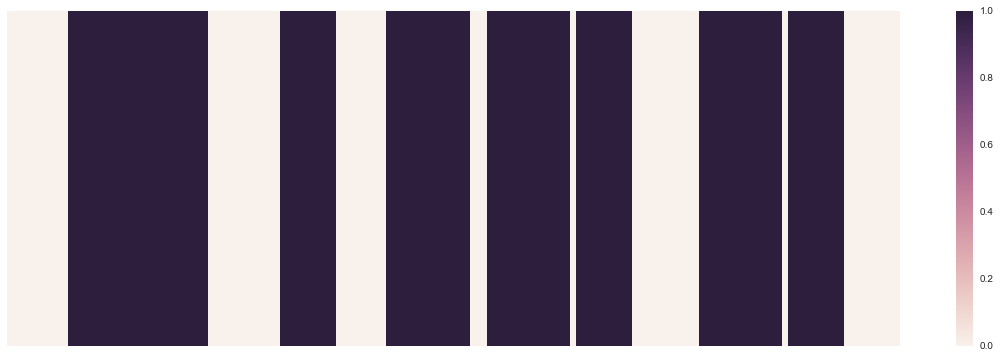

In [48]:
plt.figure(figsize=(20, 6))
sb.heatmap(pd.isnull(testing), xticklabels=False, yticklabels=False, cbar=True)

Considering that many columns present more than __60%__ of empty values, we will proceed to drop them from the data frame. In order to do that we will identify a threshold `0.6` that will be multiplied by the number of rows of the data set, meaning that when empty values are more than 60% we will remove them.

In [49]:
threshold1 = math.ceil(training.shape[0] * .6)
threshold1

threshold2 = math.ceil(testing.shape[0] * .6)
threshold2

# Dropping columns with 60% empty values
training.dropna(axis=1, thresh=threshold1, inplace=True)
testing.dropna(axis=1, thresh=threshold2, inplace=True)

Final shape of the training set

In [28]:
training.shape

(19622, 60)

Final shape of the testing set

In [50]:
testing.shape

(20, 60)

In addition to the empty values, there is categorical and time series information that will not contribute to the accurate modeling of this data

In [52]:
list(training.columns[list(range(0,7))])

['Unnamed: 0',
 'user_name',
 'raw_timestamp_part_1',
 'raw_timestamp_part_2',
 'cvtd_timestamp',
 'new_window',
 'num_window']

In [53]:
# Remove the first 7 columns that do not provide value to the analysis
training.drop(training.columns[list(range(0,7))], axis=1, inplace=True)
testing.drop(testing.columns[list(range(0,7))], axis=1, inplace=True)
testing.drop("problem_id", axis=1, inplace=True)

### Data diversity

The following plot highlights the features with the most variance amongst the entire cleaned data set. This is to select, if necessary, the columns that offer the largest range of variance.

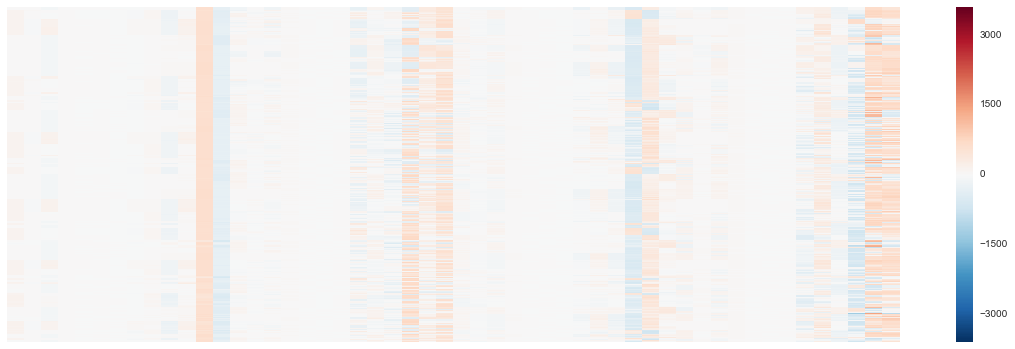

In [54]:
plt.figure(figsize=(20, 6))
sb.heatmap(training[training.columns[list(range(52))]], xticklabels=False, yticklabels=False, cbar=True)

## Model

We will split the training data into train and test sets, with a split of __80%__ and then use the test data set for cross validation.

In [32]:
X = training[training.columns[list(range(52))]]
y = training.classe
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

We will use the __RandomForestClassifier__ class to analyze our data set, and fit it to the model

In [55]:
regressor = RandomForestClassifier()
regressor.fit(X_train, y_train)
y_est = regressor.predict(X_test)

In [56]:
list(np.unique(y_est))

['A', 'B', 'C', 'D', 'E']

### Confusion Matrix

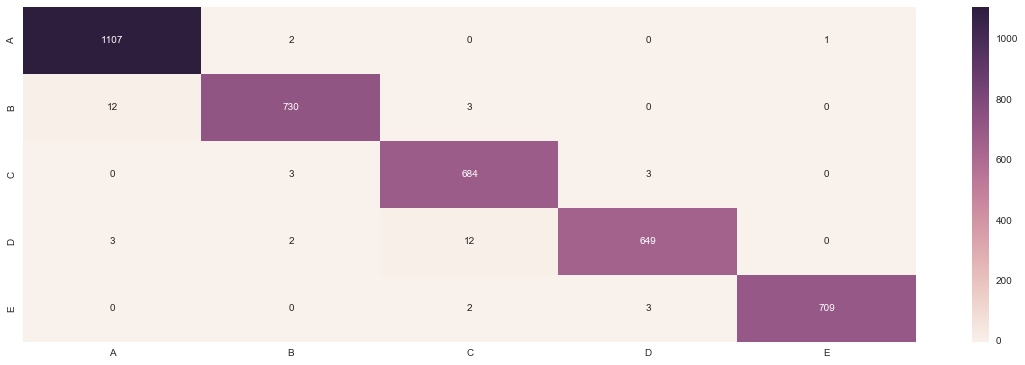

In [57]:
plt.figure(figsize=(20, 6))
sb.heatmap(confusion_matrix(y_test, y_est, labels=list(np.unique(y_est))), annot=True, fmt='g', yticklabels=list(np.unique(y_est)), xticklabels=list(np.unique(y_est)))

In [36]:
accuracy_score(y_test, y_est)

0.98980891719745223

__Accuracy__

In [61]:
"{0:.2f}%".format(accuracy_score(y_test, y_est)*100)

'98.83%'

In [62]:
target_names = list(np.unique(y_est))

In [63]:
print(classification_report(y_test, y_est, target_names=target_names))

             precision    recall  f1-score   support

          A       0.99      1.00      0.99      1110
          B       0.99      0.98      0.99       745
          C       0.98      0.99      0.98       690
          D       0.99      0.97      0.98       666
          E       1.00      0.99      1.00       714

avg / total       0.99      0.99      0.99      3925



### Predictions

In [65]:
y_pred = regressor.predict(testing)

In [66]:
list(y_pred)

['B',
 'A',
 'B',
 'A',
 'A',
 'E',
 'D',
 'B',
 'A',
 'A',
 'B',
 'C',
 'B',
 'A',
 'E',
 'E',
 'A',
 'B',
 'B',
 'B']